### Data Analytics Online Career Accelerator
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: *k*-means clustering

**This is the solution to the activity.**

Shen Lee’s manager was so impressed with her data analysis and article on the breast cancer project that she wants Shen to write a new article on athletes. The Australian Institute of Sport (AIS) has released the data of the athletes, listing their blood type, type of sport performed, body size, and other measurements (Telford & Cunningham 1991); however, the data is unlabelled, so Shen will employ one of the most common clustering algorithms, the k-means clustering algorithm, to makes sense of the data.

Can you help Shen to build a k-means clustering algorithm and fine-tune the clustering to get the optimal number of clusters and, therefore, optimal accuracy? She has to concentrate on lean body mass (`lbm`) and body mass index (`bmi`).

## 1. Prepare your workstation

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd

import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Import the data into Python.
df_ais = pd.read_csv('ais.csv')

# View the output.
df_ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [3]:
# Determine the number of null values.
df_ais.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

## 2. Evaluate the variables

In [4]:
# Determine descriptive statistics.
df_ais.describe()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


In [5]:
# List column names.
df_ais.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

## 3. Visualise the data

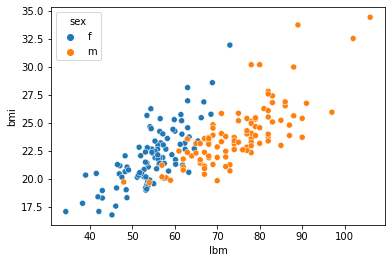

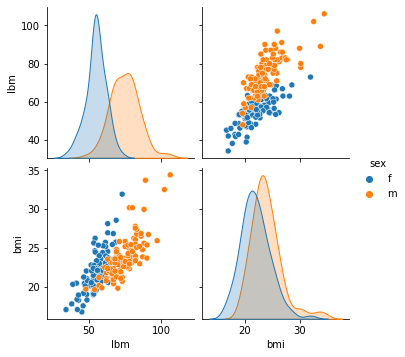

In [6]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='lbm', y='bmi',
                data=df_ais, hue='sex')


# Create a pairplot with Seaborn.
x = df_ais[['lbm', 'bmi']]

sns.pairplot(df_ais, vars=x,
             hue='sex', diag_kind= 'kde')

# 4. Improve accuracy

## Elbow method

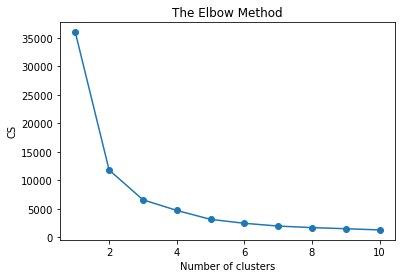

In [7]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

## Silhouette method

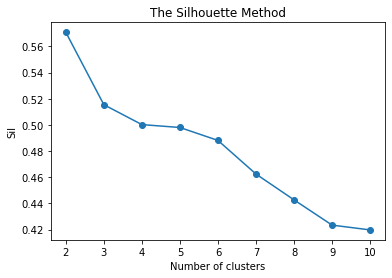

In [8]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

# 5. Evaluate and fit the model

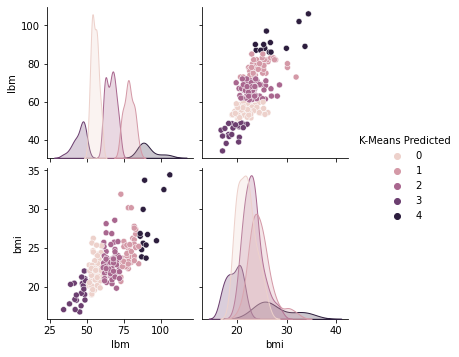

In [9]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [10]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    64
2    57
1    46
3    22
4    13
Name: K-Means Predicted, dtype: int64

# 6.Visualise the clusters

In [11]:
# View the K-Means predicted.
print(x.head())

     lbm    bmi  K-Means Predicted
0  63.32  20.56                  2
1  58.55  20.67                  0
2  55.36  21.86                  0
3  57.18  21.88                  0
4  53.20  18.96                  0


<AxesSubplot:xlabel='bmi', ylabel='lbm'>

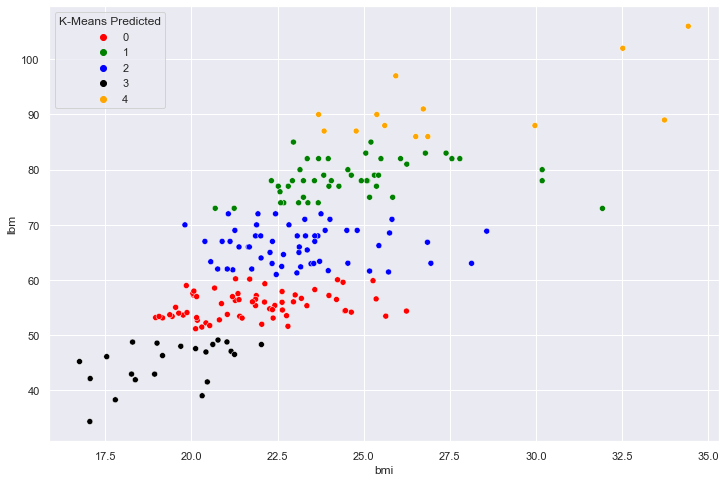

In [12]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='bmi' , 
                y ='lbm',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# 7. Conclusion
#### *Do you agree with 5 clusters? Explain your answer.*